# SPAM SMS DETECTION

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

# importing dependencies for nlp
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/aasth/OneDrive/Desktop/SDBI/R/SPAM_DETECTION/spam.csv",  encoding="latin-1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

# Renaming the columns

In [8]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.isnull().sum()

label            0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.describe().transpose()

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [11]:
# checkingn for duplicate values
df.duplicated().sum()

np.int64(403)

In [12]:
#removing the duplicates values from the data
df = df.drop_duplicates(keep= 'first')

In [13]:
df.groupby('label').describe().transpose()

label                                                            ham  \
text       count                                                4516   
           unique                                               4516   
           top     Go until jurong point, crazy.. Available only ...   
           freq                                                    1   
Unnamed: 2 count                                                  39   
           unique                                                 39   
           top      the person is definitely special for u..... B...   
           freq                                                    1   
Unnamed: 3 count                                                   9   
           unique                                                  9   
           top                                      why to miss them   
           freq                                                    1   
Unnamed: 4 count                                                   5   
           unique                                                  5   
           top                         just Keep-in-touch\" gdeve.."   
           freq                                                    1   

label                                                           spam  
text       count                                                 653  
           unique                                                653  
           top     Free entry in 2 a wkly comp to win FA Cup fina...  
           freq                                                    1  
Unnamed: 2 count                                                   4  
           unique                                                  4  
           top                                           PO Box 5249  
           freq                                                    1  
Unnamed: 3 count                                                   1  
           unique                                                  1  
           top                                  MK17 92H. 450Ppw 16"  
           freq                                                    1  
Unnamed: 4 count                                                   0  
           unique                                                  0  
           top                                                   NaN  
           freq                                                  NaN

# Data Preparation

In [14]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

<Axes: ylabel='count'>

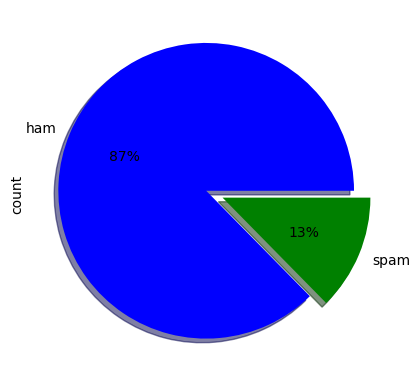

In [15]:
plot_df = df.label.value_counts()
colors = ['blue','green']
explode = (0.06 , 0.06)
plot_df.plot(kind = "pie" ,shadow = True, explode=explode, colors=colors,autopct='%1.0f%%')

In [16]:
df.loc[:, 'label'] = df['label'].map({'spam': 1, 'ham': 0}).fillna(0).astype(int)

In [17]:
#For imbalancing dataset
df_largest = df[df['label'] ==0]
df_smallest = df[df['label']==1]

In [18]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [19]:
#Resampling with replacement
df_smallest_unsampled = resample(df_smallest , replace=True , n_samples=4825 , random_state=0)
df = pd.concat([df_largest , df_smallest_unsampled])

In [20]:
df_largest  = df[df['label'] == 0].copy()   # ham (majority)
df_smallest = df[df['label'] == 1].copy()   # spam (minority)


In [21]:
print(df['label'].value_counts(dropna=False))
print(df['label'].unique())

df['label'] = df['label'].map({'spam': 1, 'ham': 0}).fillna(0)


label
1    4825
0    4516
Name: count, dtype: int64
[0 1]


C:\Users\aasth\AppData\Local\Temp\ipykernel_25616\3462741579.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label' , data=df , palette=['b','g'])
C:\Users\aasth\AppData\Local\Temp\ipykernel_25616\3462741579.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(x='label' , data=df , palette=['b','g'])


<Axes: xlabel='label', ylabel='count'>

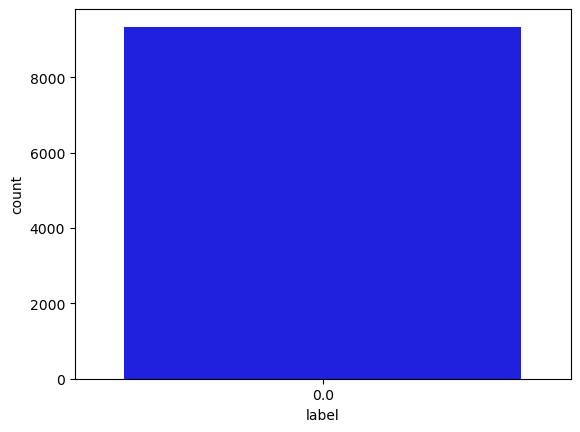

In [22]:
sns.countplot(x='label' , data=df , palette=['b','g'])

In [25]:
X = df['text']
y = df['label']

In [26]:
# Train Test Split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 0)

# Vectorization

In [27]:
vect = TfidfVectorizer(min_df=1, stop_words='english' , lowercase=True)

In [29]:
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [30]:
#label columns is in object type we need top covert it into integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Model Building

In [31]:
model = MultinomialNB()
model.fit(X_train_vect , y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


# Prediction and accuracy

In [32]:
pred = model.predict(X_test_vect)
acc = accuracy_score(y_test, pred)
print("Accuracy:", np.round(acc, 4) * 100, "%")

Accuracy: 100.0 %
